<div style = "text-align:center">
<span style = "font-size:30px">Mechine Learning - Linear Regression</span>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data = pd.read_csv("/home/jishnu/Desktop/ Data_Sets/beer-servings.csv")

In [3]:
df = data.copy() #! copied Dataset

In [4]:
print(df.info())
print("")
print("missing value count")
print(df.isnull().sum())
print("")
print(f"df.duplicated().sum()")
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB
None

missing value count
Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

df.duplicated().sum()


,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


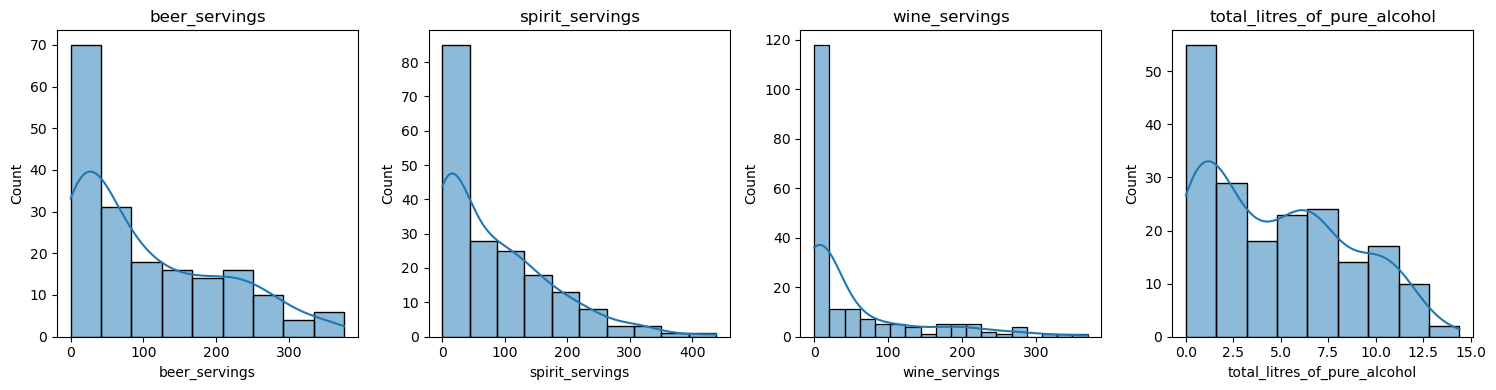

In [5]:
c1 = df.select_dtypes("float")

fig,axs = plt.subplots(1,4,figsize = (15,4))

for i in range(4):
    sns.histplot(data = df, x=c1.columns[i],ax = axs[i],kde= True)
    axs[i].set_title(c1.columns[i])
plt.tight_layout()
plt.show()

In [6]:
for i in c1.columns:
    df[i] = df[i].fillna(df[i].median())  #! Filling missing values

In [7]:
df.isnull().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [8]:
df.drop("Unnamed: 0",axis=1,inplace=True)

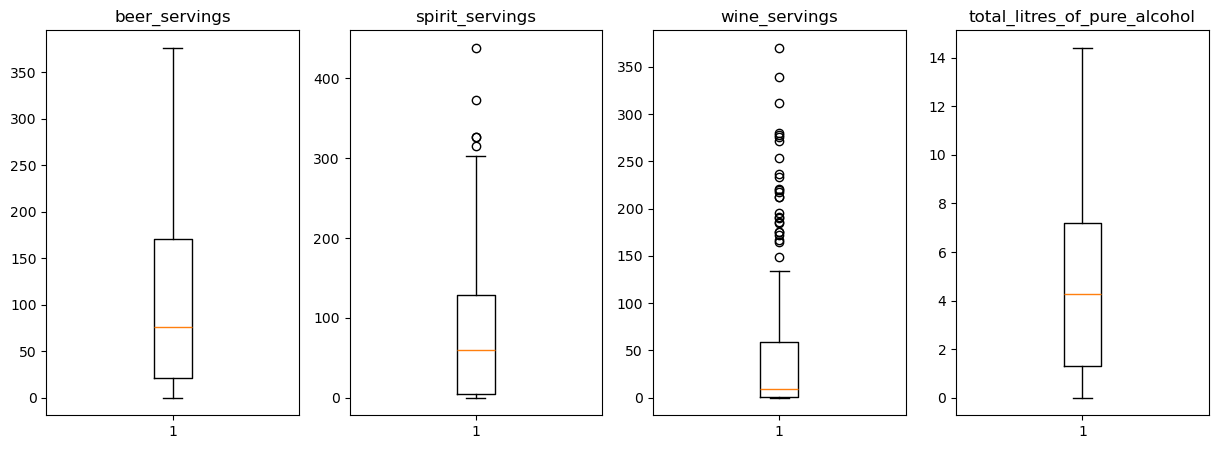

In [9]:
c2 = df.select_dtypes("float")

fig,axs = plt.subplots(1,4,figsize=(15,5))

for i in range(4):
    axs[i].boxplot(df[c2.columns[i]])
    axs[i].set_title(c2.columns[i])

In [10]:
def outliers(df,col):
    Q1 = np.percentile(df[col],25,method = "midpoint")
    Q3 = np.percentile(df[col],75,method = "midpoint")

    IQR = Q3-Q1

    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR

    outlier = df[(df[col]>upper) | (df[col]<lower)][col].tolist()

    return outlier

In [11]:
List1 = outliers(df, "spirit_servings")

print(List1)

[373.0, 438.0, 326.0, 326.0, 315.0]


In [12]:
List2 = outliers(df, "wine_servings")
print(List2)

[312.0, 221.0, 212.0, 191.0, 212.0, 172.0, 254.0, 278.0, 233.0, 370.0, 149.0, 175.0, 218.0, 185.0, 165.0, 237.0, 271.0, 190.0, 175.0, 339.0, 167.0, 276.0, 186.0, 280.0, 195.0, 220.0]


In [13]:
le = LabelEncoder()

c3 = df.select_dtypes("object")

c3.nunique()

country      193
continent      6
dtype: int64

In [14]:
df.drop("country",axis=1,inplace=True)

In [15]:
df["continent"] = le.fit_transform(df["continent"])

In [16]:
mm = MinMaxScaler()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   beer_servings                 193 non-null    float64
 1   spirit_servings               193 non-null    float64
 2   wine_servings                 193 non-null    float64
 3   total_litres_of_pure_alcohol  193 non-null    float64
 4   continent                     193 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.7 KB


In [17]:
c4 = ["beer_servings", "spirit_servings", "wine_servings"]

df[c4] = mm.fit_transform(df[c4]) #! scaling

In [19]:
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
count,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.276375,0.187806,0.132124,4.739119,1.694301
std,0.262181,0.199519,0.214641,3.757996,1.501672
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.055851,0.011416,0.002703,1.300000,0.000000
50%,0.202128,0.136986,0.024324,4.250000,1.000000
75%,0.454787,0.292237,0.159459,7.200000,3.000000
max,1.000000,1.000000,1.000000,14.400000,5.000000
